<a href="https://colab.research.google.com/github/SURYA-MANUSANI/Traffic-Sign-Classification-Using-Convolutional-Neural-Networks-CNN-/blob/main/Traffic_Sign_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Trafic Sign Classification.jpg to Trafic Sign Classification.jpg


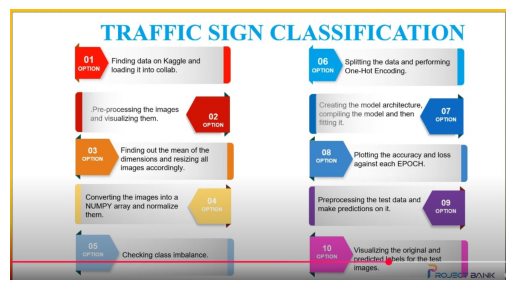

In [8]:
img = Image.open("Trafic Sign Classification.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [10]:
#Next, install the kaggle API client.
!pip install -q kaggle

In [11]:
#The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

#This permissions change avoids a warning on Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
#Creating directory and Changing te current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [15]:
#Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark    641568792  2018-11-25 18:12:34.427000         141345       1205  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                          4471088826  2019-08-31 18:22:11.850000          17589        309  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                          123621493  2023-07-11 04:21:24.180000           2203         35  1.0

In [16]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
/content


In [17]:
ls

 kaggle.json    traffic_sign_dataset/
 sample_data/  'Trafic Sign Classification.jpg'


In [19]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [21]:
!unzip archive.zip -d traffic_sign_dataset
!rm archive.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [23]:
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

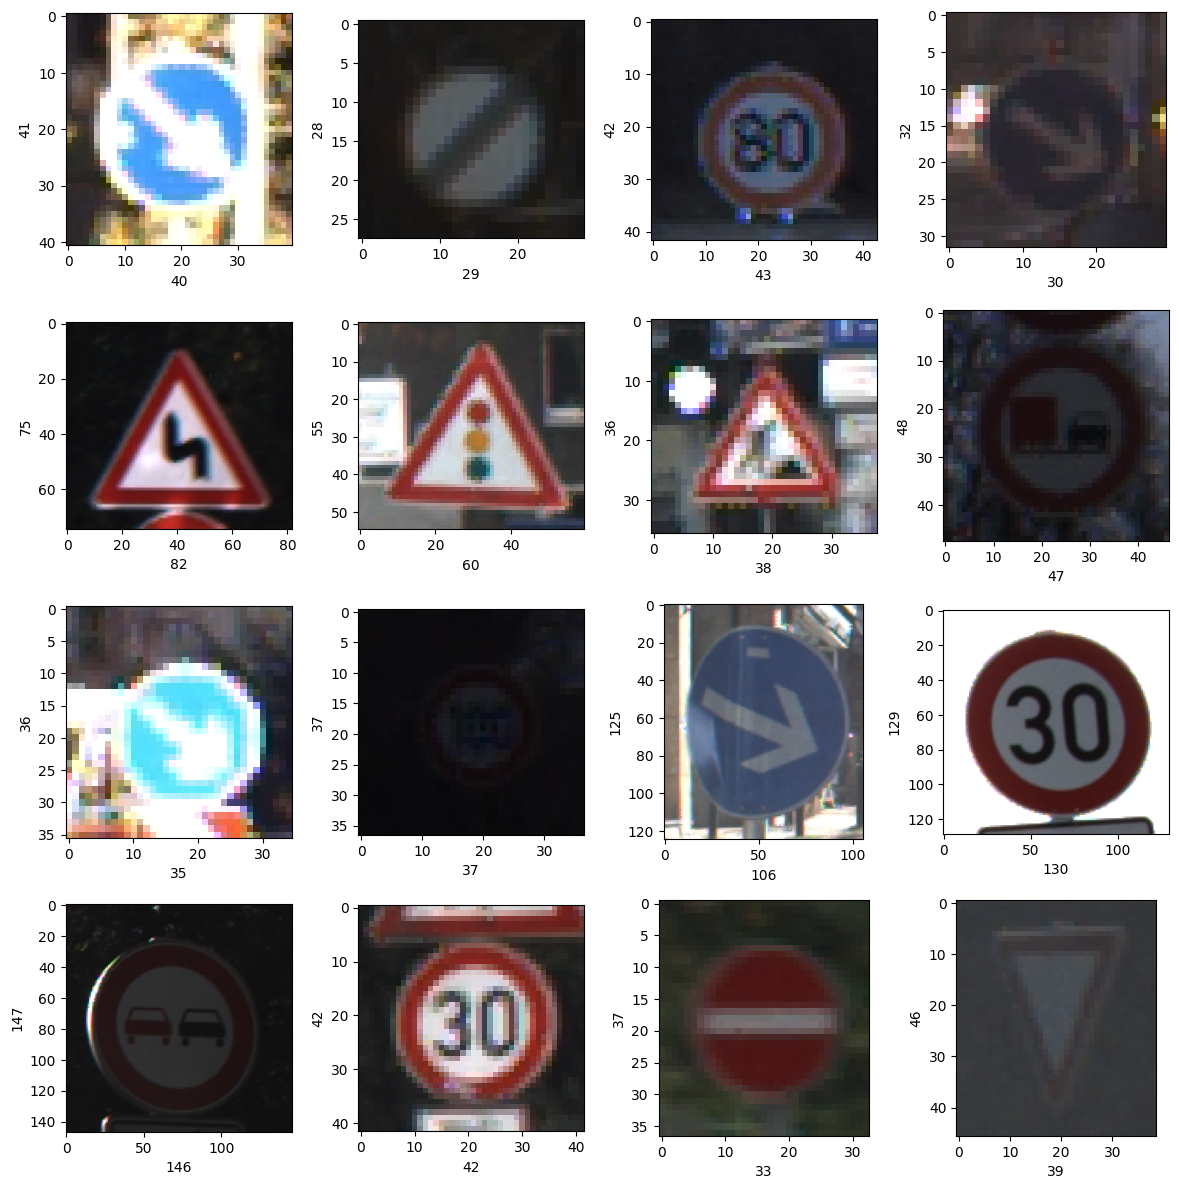

In [24]:
#Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [26]:
dim1 = []
dim2 = []
for i in range (0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [28]:
#Printing mean dimension of images
print("Dimension 1 Mean : ", np.mean(dim1), "Dimension 2 Mean : " , np.mean(dim2))

Dimension 1 Mean :  50.328929582493814 Dimension 2 Mean :  50.83587951745773


In [33]:
images = []
label_id = []

for i in range (43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [34]:
images = np.array(images)
images = images/255

In [35]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [36]:
images.shape

(39209, 50, 50, 3)

In [37]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070


In [38]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size = 0.2, random_state = 42)

In [41]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [48]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = x_train.shape[1:], activation = 'relu', padding= 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [49]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 223s - 908ms/step - accuracy: 0.3112 - loss: 2.5091 - val_accuracy: 0.6859 - val_loss: 1.2531
Epoch 2/10
246/246 - 258s - 1s/step - accuracy: 0.6263 - loss: 1.1867 - val_accuracy: 0.8931 - val_loss: 0.5108
Epoch 3/10
246/246 - 269s - 1s/step - accuracy: 0.7453 - loss: 0.7813 - val_accuracy: 0.9422 - val_loss: 0.2903
Epoch 4/10
246/246 - 263s - 1s/step - accuracy: 0.8041 - loss: 0.6052 - val_accuracy: 0.9633 - val_loss: 0.1936
Epoch 5/10
246/246 - 260s - 1s/step - accuracy: 0.8341 - loss: 0.5007 - val_accuracy: 0.9705 - val_loss: 0.1682
Epoch 6/10
246/246 - 262s - 1s/step - accuracy: 0.8585 - loss: 0.4351 - val_accuracy: 0.9725 - val_loss: 0.1242
Epoch 7/10
246/246 - 263s - 1s/step - accuracy: 0.8685 - loss: 0.3960 - val_accuracy: 0.9810 - val_loss: 0.1028
Epoch 8/10
246/246 - 260s - 1s/step - accuracy: 0.8844 - loss: 0.3598 - val_accuracy: 0.9823 - val_loss: 0.0919
Epoch 9/10
246/246 - 263s - 1s/step - accuracy: 0.8921 - loss: 0.3273 - val_accuracy: 0.9833 - val_lo

<Axes: >

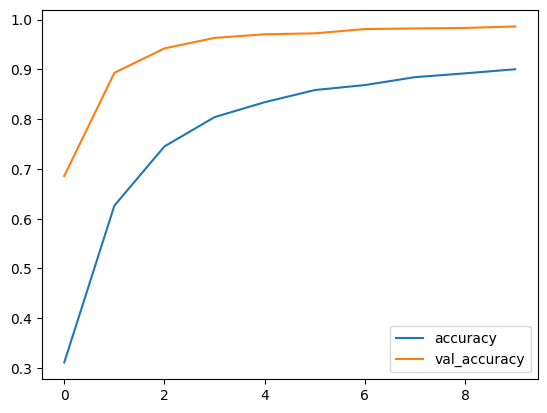

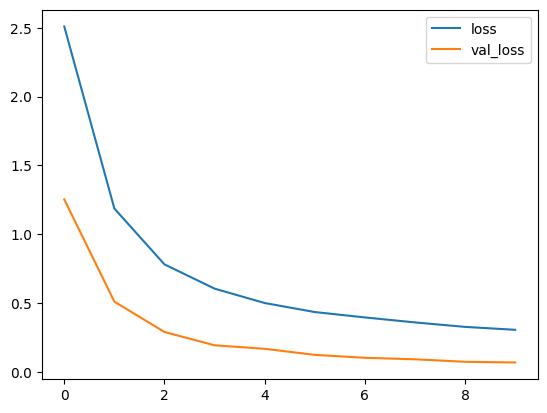

In [52]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [72]:
def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        # Check if the file is an image before opening it
        if x.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add more extensions if needed
            img = Image.open(test_path + "/" + x)
            img = img.resize((50,50))
            img = np.array(img)
            images.append(img)


    images = np.array(images)
    images = images/255

    return images

In [74]:
test_path = pd.read_csv("traffic_sign_dataset/Test.csv")

In [75]:
test_path2 = 'traffic_sign_dataset/Test'
test_images = scaling(sorted(os.listdir(test_path2)), test_path2)

In [76]:
test = pd.read_csv("traffic_sign_dataset/Test.csv")
y_test = test["ClassId"].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [77]:
y_pred_probs = model.predict(test_images)  # Get prediction probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with highest probability
y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [78]:
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',

              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',

              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',

              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',

              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',

              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',

              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',

              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',

              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',

              'End of no passing','End of no passing by vechiles over 3.5 metric']


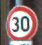

In [79]:
img = Image.open(test_path2+ '/00001.png')
img

In [80]:
print("Original label : ", all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [81]:
print("Predicted label : ", all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)
